# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [170]:
#dependencies
from api_keys import weather_api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Generate Cities List

In [173]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create random lat longs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Match random lat long points to nearest city 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)
len(cities)


601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [174]:
# OpenWeatherMap API Key
#api_key = api_keys.weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial" 
query_url = f'{url}appid={weather_api_key}&units={units}&q='

# Create empty lists to append the API data into lists 
city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
humidity = []
lat = []
lng = []

#create record counter
record = 1
Set = 1

#Output responses to screen 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


#Loop through the cities list
for city in cities:
    #Try cites to retreive weather data
    try: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]

        print(f"Processing Record {record} of set {Set} | {city_record}")
        #record count calculation
        
        if record <50 : 
            record += 1 
            Set = Set
        else :  
            Set += 1
            record = 1 
        #Insert pause to api 
        time.sleep(1.04)

    #if no city found in weather api 
    except: 
        print("City not found. Skipping...") 
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | Hobart
City not found. Skipping...
Processing Record 2 of set 1 | La Santisima Trinidad
City not found. Skipping...
Processing Record 3 of set 1 | Laramie
City not found. Skipping...
Processing Record 4 of set 1 | Bredasdorp
City not found. Skipping...
Processing Record 5 of set 1 | Birao
City not found. Skipping...
Processing Record 6 of set 1 | Barrow
City not found. Skipping...
Processing Record 7 of set 1 | Beringovskiy
City not found. Skipping...
Processing Record 8 of set 1 | Rikitea
City not found. Skipping...
Processing Record 9 of set 1 | Joshīmath
City not found. Skipping...
Processing Record 10 of set 1 | Plettenberg Bay
City not found. Skipping...
Processing Record 11 of set 1 | Constitución
City not found. Skipping...
Processing Record 12 of set 1 | Tuktoyaktuk
City not found. Skipping...
Processing Record 13 of set 1 | Hilo
City not found. Skipping...
Processing Record 14 of set 1 | Ru

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [176]:
city_data = pd.DataFrame({"City Name" :city_name,
                        "Lat" : lat,
                        "Long ": lng,
                        "Max Temp" : max_temp, 
                        "Humidity" : humidity,
                        "Cloudiness" : cloudiness,
                        "Wind Speed" : wind_speed,
                        "Country" : country,
                        "Date" : date
})

city_data.to_csv("../output_data/city_data.csv",index=False, header=True, encoding="utf-8")
city_data

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,62.01,51,75,14.99,AU,1599103062
1,La Santisima Trinidad,-14.83,-64.90,72.14,47,0,5.86,BO,1599103262
2,Laramie,41.31,-105.59,69.01,19,1,6.93,US,1599103262
3,Bredasdorp,-34.53,20.04,57.20,82,10,6.93,ZA,1599103117
4,Birao,10.28,22.79,68.61,97,100,5.03,CF,1599103262
...,...,...,...,...,...,...,...,...,...
546,Tagusao,9.19,117.81,86.76,64,31,1.45,PH,1599103377
547,Riyadh,24.69,46.72,82.40,30,0,4.29,SA,1599103377
548,Severo-Kuril'sk,50.68,156.12,56.71,82,99,16.53,RU,1599103145
549,Poptún,16.33,-89.42,70.39,99,100,0.96,GT,1599103377


In [177]:
city_data.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,22.819274,16.660817,66.637858,70.909256,48.272232,7.865880,1.599103e+09
std,33.277288,91.149869,14.471856,21.508707,39.291340,5.171062,1.202876e+02
min,-54.800000,-175.200000,24.130000,1.000000,0.000000,0.380000,1.599103e+09
25%,-3.170000,-65.200000,54.585000,57.000000,3.500000,4.000000,1.599103e+09
50%,29.720000,22.360000,68.000000,76.000000,46.000000,6.930000,1.599103e+09
75%,49.805000,99.675000,78.765000,87.000000,90.000000,10.605000,1.599103e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,30.910000,1.599103e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [168]:
#  Get the indices of cities that have humidity over 100%.


In [169]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

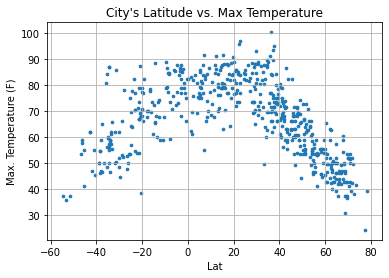

In [178]:
# Build a scatter plot temp vs lat
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", s=7)

# Label chart 
plt.title("City's Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Lat")
plt.grid(True)

plt.show()

## SUMMARY
* Creating a scatter plot of City's Latitude vs. Max Temperature 
* The Temp shows a correlation in that the closer to the equator the warmer it is. 

## Latitude vs. Humidity Plot

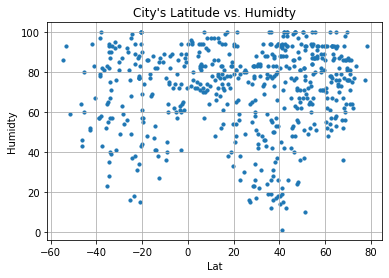

In [179]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", s=10)

# Label chart 
plt.title("City's Latitude vs. Humidty")
plt.ylabel("Humidty")
plt.xlabel("Lat")
plt.grid(True)

plt.show()

In [ ]:
## SUMMARY
* Creating a scatter plot of City's Latitude vs. Humidty 
* The plot shows no correlation between the two varabiles 

## Latitude vs. Cloudiness Plot

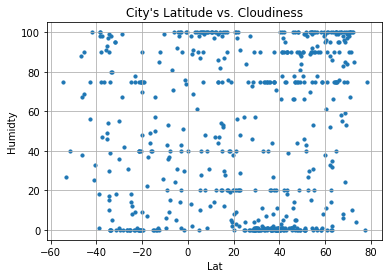

In [180]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", s=10)

# Label chart 
plt.title("City's Latitude vs. Cloudiness")
plt.ylabel("Humidty")
plt.xlabel("Lat")
plt.grid(True)

plt.show()

## SUMMARY
* Creating a scatter plot of City's Latitude vs. Cloudiness 
* The plot shows no correlation between the two varabiles 

## Latitude vs. Wind Speed Plot

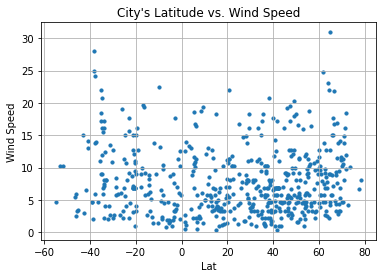

In [182]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", s=10)

# Label chart 
plt.title("City's Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.grid(True)

plt.show()

## SUMMARY
* Creating a scatter plot of City's Latitude vs. Wind Speed 
* The plot shows no correlation between the two varabiles 

## Linear Regression

In [183]:
#Split main data frame into northerna dn southern hemispheres
northern_hemisphere = city_data.loc[city_data["Lat"] >= 0]
southern_hemisphere = city_data.loc[city_data["Lat"] < 0]

#Define a fct to create lineregression and scater plot 
def linear_aggression(x,y):
    print(f"The r-value is {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rValue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    return line_eq
#Define a fct to call for annotating lineregress
def annotate(line_eq, a, b):
    plt.annotate(line_eq, (a,b), fontsize = 15, color = "red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8


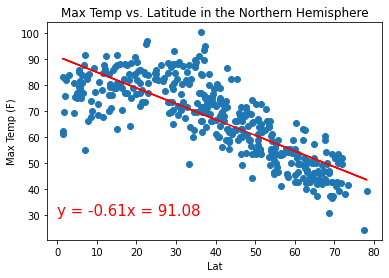

In [184]:
# Calculate the correlation coefficient betweenNorthern Hemisphere cities vs Max Temp

# call linear function 
equation = linear_aggression(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"]) 

# call annotate function 
annotate(equation, 0, 30)

plt.title("Max Temp vs. Latitude in the Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.savefig("../output_data/NorthernvsMaxTemp.png",index=False, header=True, encoding="utf-8")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7


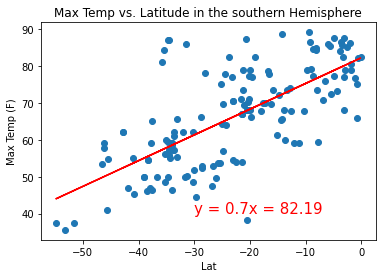

In [185]:
# call linear function 
equation = linear_aggression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"]) 

# call annotate function 
annotate(equation, -30, 40)

plt.title("Max Temp vs. Latitude in the southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.savefig("../output_data/SouthernvsMaxTemp.png",index=False, header=True, encoding="utf-8")

## SUMMARY
* Both Hemispheres R value return a Strong correlation for Max temps

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.04


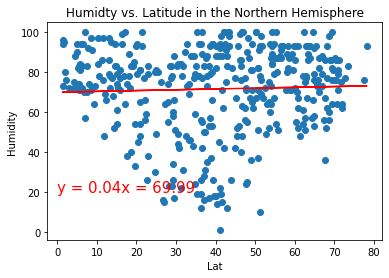

In [186]:
# call linear function 
equation = linear_aggression(northern_hemisphere["Lat"],northern_hemisphere["Humidity"]) 

# call annotate function 
annotate(equation, 0, 20)

plt.title("Humidty vs. Latitude in the Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.savefig("../output_data/NorthernvsHumidty.png",index=False, header=True, encoding="utf-8")

## SUMMARY
* Both Hemispheres R value return a weak correlation for Humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.04


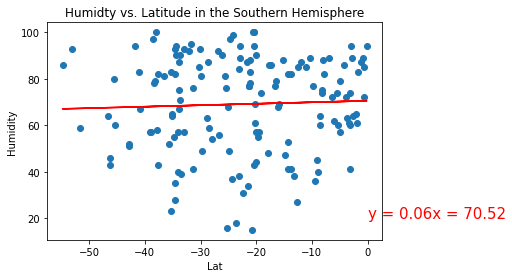

In [187]:
# call linear function 
equation = linear_aggression(southern_hemisphere["Lat"],southern_hemisphere["Humidity"]) 

# call annotate function 
annotate(equation, 0, 20)

plt.title("Humidty vs. Latitude in the Southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.savefig("../output_data/SouthhernvsHumidty.png",index=False, header=True, encoding="utf-8")

## SUMMARY
* Both Hemispheres R value return a weak correlation for Humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.04


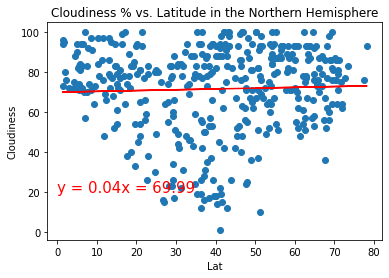

In [188]:
# call linear function 
equation = linear_aggression(northern_hemisphere["Lat"],northern_hemisphere["Humidity"]) 

# call annotate function 
annotate(equation, 0, 20)

plt.title("Cloudiness % vs. Latitude in the Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/NorthernvsCloudiness.png",index=False, header=True, encoding="utf-8")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.04


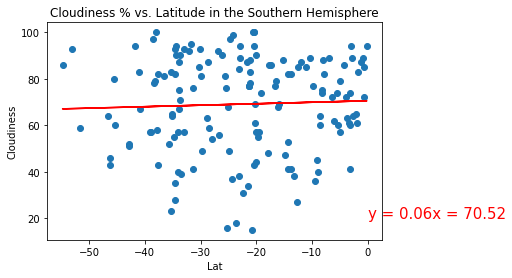

In [189]:
# call linear function 
equation = linear_aggression(southern_hemisphere["Lat"],southern_hemisphere["Humidity"]) 

# call annotate function 
annotate(equation, 0, 20)

plt.title("Cloudiness % vs. Latitude in the Southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/SouthhernvsCloudiness.png",index=False, header=True, encoding="utf-8")

## SUMMARY
* Both Hemispheres R value return a weak correlation for cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.04


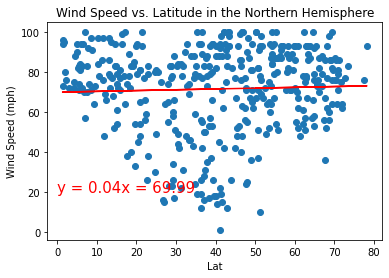

In [190]:
# call linear function 
equation = linear_aggression(northern_hemisphere["Lat"],northern_hemisphere["Humidity"]) 

# call annotate function 
annotate(equation, 0, 20)

plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/NorthernvsWindSpeed.png",index=False, header=True, encoding="utf-8")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.04


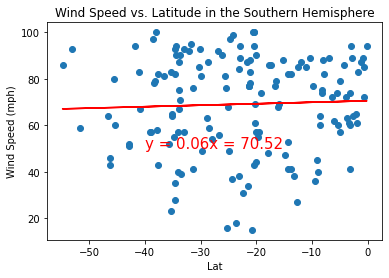

In [191]:
# call linear function 
equation = linear_aggression(southern_hemisphere["Lat"],southern_hemisphere["Humidity"]) 

# call annotate function 
annotate(equation, -40, 50)

plt.title("Wind Speed vs. Latitude in the Southern Hemisphere")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/SouthhernvsWindSpeed.png",index=False, header=True, encoding="utf-8")

## SUMMARY
* Both Hemispheres R value return a weak correlation for Wind speed %